**Import of libraries**

In [1]:
import pandas as pd
import numpy as np

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import classification_report

import json
import requests

**Functions for reading and saving data**

In [2]:
def load_obj( name ):
    """
    Function to load file using pickle library. Parameter is name of file without file extention.
    """
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [3]:
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

**Loading data**

In [4]:
data = pd.read_csv("tendency_to_obesity.csv")
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


**Data pre-processing**

In [5]:
#no data is missing
data.isnull().sum().sum()

0

In [6]:
#let's take a look on common information about dataframe
data.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
#let's convert strings into numbers and take a look onto processed dataframe
data['Gender'].replace({'Male': 1, 'Female': 0}, inplace = True)
data['family_history_with_overweight'].replace({'yes': 1, 'no': 0}, inplace = True)
data['FAVC'].replace({'yes': 1, 'no': 0}, inplace = True)
data['SMOKE'].replace({'yes': 1, 'no': 0}, inplace = True)
data['SCC'].replace({'yes': 1, 'no': 0}, inplace = True)
data['CAEC'].replace({'Always': 4, 'Frequently': 3, 'Sometimes': 2, 'no' : 1}, inplace = True)
data['CALC'].replace({'Always': 4, 'Frequently': 3, 'Sometimes': 2, 'no' : 1}, inplace = True)
data['MTRANS'].replace({'Automobile' : 1, 'Motorbike' : 2, 'Public_Transportation' : 4,\
                        'Bike' : 3, 'Walking' : 5}, inplace = True)
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,1,4,Normal_Weight
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,4,Normal_Weight
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,3,4,Normal_Weight
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,3,5,Overweight_Level_I
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,4,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,4,Obesity_Type_III
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,4,Obesity_Type_III
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,4,Obesity_Type_III
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,4,Obesity_Type_III


In [8]:
#now let's split data into features-objects matrix and target
X = data.drop('NObeyesdad', axis = 1)

target_class = np.array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)
le = LabelEncoder()
target_asced = le.fit_transform(target_class)
y = data['NObeyesdad']
y = le.transform(y)

In [9]:
#while testing different models i figured out that 'SMOKE' column has least significant 
#feature importance and without it models work better so let's drop it
X.drop('SMOKE', axis = 1, inplace = True)

In [10]:
#let's add another feature - body mass index. It's used by doctors to check if the patient has healthy weight
X['BMI'] = X['Weight'] / (X['Height'] ** 2)

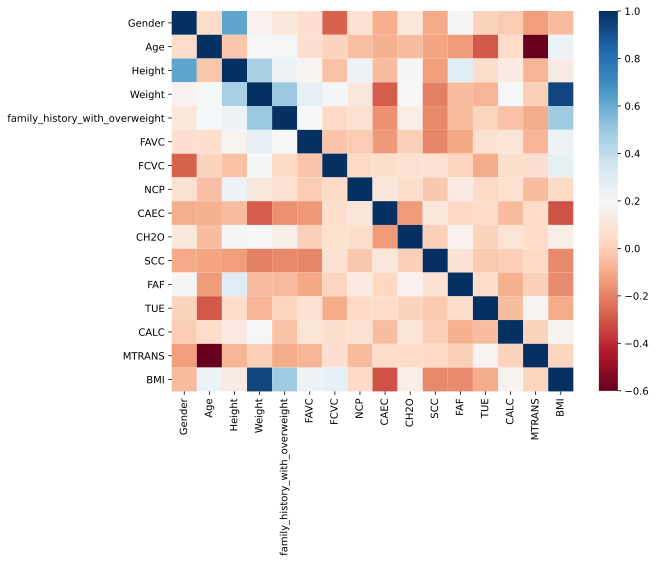

In [11]:
#let's take a look on correlation matrix
fig, ax = plt.subplots(figsize=(9, 7))
X_corr = X.corr()
sns.heatmap(X_corr, cmap="RdBu", ax = ax)

In [12]:
#as wee can see weight and BMI are highly correlated but that's okay 'cause BMI depends 
#linearly on weight according to formula

In [13]:
#now we need to split data onto train and test samples
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [14]:
#then we need to scale samples
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_unscaled)

In [15]:
X_test = scaler.transform(X_test_unscaled)

**Model** 

I've chosen Extra Trees Classifier 'cause it was the simplest model that gave best results. I'd be lying if I didn't mention that logistic regression gave almost the same result (0.98). Also it's noteworthy that Cat Boosting gave the same result (0.99)  with the following parameters *CatBoostClassifier(l2_leaf_reg=10, iterations=600, bootstrap_type = 'Bernoulli', subsample = 0.7, random_strength=5.5, learning_rate=0.15, max_depth=5, loss_function='MultiClass', use_best_model=True)* but it works far longer that both models mentioned above.

In [16]:
%%time
#so let's train chosen model
extra_clf = ExtraTreesClassifier(n_estimators = 400, max_samples = 0.7, max_features = 0.7, criterion = 'entropy',\
                                 min_samples_split = 10, n_jobs=-1, random_state=1)
extra_clf.fit(X_train, y_train)

y_pred_extra = extra_clf.predict(X_test)

Wall time: 1.64 s


In [17]:
#results
report_rnd_tree = classification_report(y_test, y_pred_extra, target_names=data['NObeyesdad'].unique())
print(report_rnd_tree)

                     precision    recall  f1-score   support

      Normal_Weight       0.97      0.99      0.98        68
 Overweight_Level_I       0.97      0.96      0.97        78
Overweight_Level_II       1.00      1.00      1.00        94
     Obesity_Type_I       0.99      1.00      0.99        75
Insufficient_Weight       1.00      0.99      0.99        79
    Obesity_Type_II       0.99      0.99      0.99        71
   Obesity_Type_III       1.00      1.00      1.00        63

           accuracy                           0.99       528
          macro avg       0.99      0.99      0.99       528
       weighted avg       0.99      0.99      0.99       528



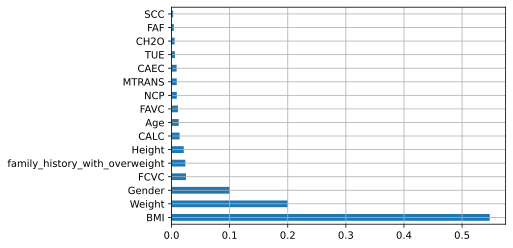

In [18]:
#let's take a look on feature importances. BMI has the biggest impact on results
imp = pd.Series(extra_clf.feature_importances_, index=X.columns).sort_values(ascending=False).plot(kind='barh')
plt.grid();

**Saving model and scaler**

In [19]:
save_obj(extra_clf, 'extra_trees_classifier')

In [20]:
save_obj(scaler, 'scaler')

**API**

In [21]:
header = {'Content-Type': 'application/json', \
          'Accept': 'application/json'}

In [22]:
id_zap = 0

In [23]:
data_zap = X.iloc[[id_zap]].to_json(orient="split")
data_zap

'{"columns":["Gender","Age","Height","Weight","family_history_with_overweight","FAVC","FCVC","NCP","CAEC","CH2O","SCC","FAF","TUE","CALC","MTRANS","BMI"],"index":[0],"data":[[0,21.0,1.62,64.0,1,0,2.0,3.0,2,2.0,0,0.0,1.0,1,4,24.3865264441]]}'

In [24]:
X.iloc[[id_zap]]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,2.0,0,0.0,1.0,1,4,24.386526


In [25]:
df = pd.read_json(data_zap, orient='split')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,0,21,1.62,64,1,0,2,3,2,2,0,0,1,1,4,24.386526


In [28]:
"""POST <url>/predict
"""
#resp = requests.post("http://127.0.0.1:5000/predict", data = json.dumps(data_zap), headers = header)

'POST <url>/predict\n'

In [29]:
#resp.status_code

In [30]:
#resp.json()[0]

In [31]:
#data = json.dumps(data_zap)

In [32]:
#print(data)